In [12]:
import os

subj = "Subj1"
exp = "exp_rtd_ae"
os.makedirs(f"{subj}/{exp}", exist_ok = True)

In [22]:
import SDA
import SDA.analytics
import SDA.clustquality

import numpy
import pandas
import sklearn.preprocessing
import matplotlib.pyplot as plt

In [14]:
edges_true = numpy.loadtxt(f"{subj}/reproduction/internal/best_edges.txt").astype(numpy.int32)
features = pandas.read_feather(f'{subj}/exp_final_filtered/all_features.feather')
print(features.shape)

(1046, 3799)


In [15]:
features = sklearn.preprocessing.StandardScaler().fit_transform(features)
numpy.save(f'{subj}/{exp}/full_data.npy', features)

In [ ]:
# python3.9 rtd_ae.py Subj1 exp_rtd_ae 8
# python3.9 rtd_ae.py Subj1 exp_rtd_ae 16
# python3.9 rtd_ae.py Subj1 exp_rtd_ae 32
# python3.9 rtd_ae.py Subj1 exp_rtd_ae 48
# python3.9 rtd_ae.py Subj1 exp_rtd_ae 64

In [41]:
rtd_stats = [ ]
for n_dim in [ 8, 16, 32, 48, 64 ]:
    features_reduced = numpy.load(f'{subj}/{exp}/{n_dim}.npy')
    result, df_st_edges = SDA.SDA(scale = False).apply(features_reduced)

    metrics = [ ]
    for row in result['St_edges']:
        metrics.append(SDA.clustquality.cluster_metrics_ground(edges_true, row))
    result = pandas.concat([ result, pandas.DataFrame(metrics) ], axis = 1)
    
    best_result = SDA.analytics.best_result(result, key = 'Avg-Silh', n_stages = 9)
    best_result["N_Dim"] = str(n_dim)
    best_result["Key"] = 'Avg-Silh'
    rtd_stats.append(best_result)
    
    best_result = SDA.analytics.best_result(result, key = 'FMI', n_stages = 9)
    best_result["N_Dim"] = str(n_dim)
    best_result["Key"] = 'FMI'
    rtd_stats.append(best_result)

rtd_stats = pandas.DataFrame(rtd_stats)[["N_Dim", "Key", "Ward_dist", "Cen_dist", "Avg-Silh", "Avg-Cal-Har", "Avg-Dav-Bold", "AMI", "ARI", "FMI"]]
rtd_stats.to_csv(f"{subj}/{exp}/rtd_stats.csv")
display(rtd_stats)

Applying to 1046 samples with 8 features each
Running stage 1


  0%|          | 0/589 [00:00<?, ?it/s]

Running stage 2


  0%|          | 0/672 [00:00<?, ?it/s]

Applying to 1046 samples with 16 features each
Running stage 1


  0%|          | 0/589 [00:00<?, ?it/s]

Running stage 2


  0%|          | 0/672 [00:00<?, ?it/s]

Applying to 1046 samples with 32 features each
Running stage 1


  0%|          | 0/589 [00:00<?, ?it/s]

Running stage 2


  0%|          | 0/672 [00:00<?, ?it/s]

Applying to 1046 samples with 48 features each
Running stage 1


  0%|          | 0/589 [00:00<?, ?it/s]

Running stage 2


  0%|          | 0/672 [00:00<?, ?it/s]

Applying to 1046 samples with 64 features each
Running stage 1


  0%|          | 0/589 [00:00<?, ?it/s]

Running stage 2


  0%|          | 0/672 [00:00<?, ?it/s]

,N_Dim,Key,Ward_dist,Cen_dist,Avg-Silh,Avg-Cal-Har,Avg-Dav-Bold,AMI,ARI,FMI
0,8,Avg-Silh,7.428167,0.336179,0.148517,51.725930,2.312608,0.805238,0.623603,0.675934
1,8,FMI,7.365513,0.337285,0.136032,51.208639,2.290803,0.847208,0.736136,0.773407
2,16,Avg-Silh,4.455465,0.272492,0.125673,38.240277,2.755885,0.821180,0.633637,0.684543
3,16,FMI,4.253406,0.255763,0.102528,34.529729,2.826028,0.838892,0.697849,0.740587
4,32,Avg-Silh,3.817590,0.255532,0.138503,38.809205,2.795165,0.808651,0.632737,0.684031
5,32,FMI,3.432479,0.230648,0.091265,33.847995,2.970654,0.860972,0.782709,0.813498
6,48,Avg-Silh,2.480144,0.210619,0.097322,23.411023,3.214711,0.799590,0.611164,0.665161
7,48,FMI,2.593634,0.205062,0.078626,24.711507,3.221692,0.855945,0.722690,0.761841
8,64,Avg-Silh,3.103958,0.231839,0.117122,31.350112,2.985244,0.799822,0.609208,0.663296
9,64,FMI,2.830534,0.210869,0.081749,27.644067,3.141166,0.837469,0.723467,0.762450


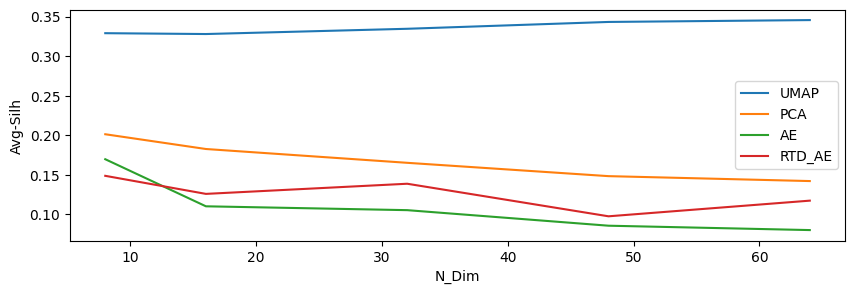

In [42]:
def get_xy(stats):
    stats = stats[stats["Key"] == "Avg-Silh"]
    return stats["N_Dim"], stats["Avg-Silh"]

pca_stats = pandas.read_csv(f'{subj}/exp_final_filtered/pca_stats.csv')
umap_stats = pandas.read_csv(f'{subj}/exp_final_filtered/umap_stats.csv')
ae_stats = pandas.read_csv(f'{subj}/exp_final_filtered/ae_stats.csv')
rtd_stats = pandas.read_csv(f'{subj}/{exp}/rtd_stats.csv')

plt.rcParams["figure.figsize"] = (10, 3)
plt.plot(*get_xy(umap_stats), label = 'UMAP')
plt.plot(*get_xy(pca_stats), label = 'PCA')
plt.plot(*get_xy(ae_stats), label = 'AE')
plt.plot(*get_xy(rtd_stats), label = 'RTD_AE')
plt.ylabel("Avg-Silh")
plt.xlabel("N_Dim")
plt.legend()